In [1]:
import pandas as pd
import os

# Load Data

In [2]:
current_dir = os.getcwd() #current dir
parent_dir = os.path.dirname(current_dir) #parent of current dir

In [3]:
current_dir

'/Users/aybikealkan/code/aybik/movie_picker/notebooks'

In [5]:
movies = pd.read_csv(os.path.join(parent_dir,'raw_data/movies.csv'))
actors = pd.read_csv(os.path.join(parent_dir,'raw_data/actors.csv'))
crew = pd.read_csv(os.path.join(parent_dir,'raw_data/crew.csv'))
languages = pd.read_csv(os.path.join(parent_dir,'raw_data/languages.csv'))
genres = pd.read_csv(os.path.join(parent_dir,'raw_data/genres.csv'))
studios = pd.read_csv(os.path.join(parent_dir,'raw_data/studios.csv'))
countries = pd.read_csv(os.path.join(parent_dir,'raw_data/countries.csv'))

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

# Preprocessing

In [19]:
movies = movies.drop(columns='tagline', axis=1)

actors = actors.drop(columns='role', axis=1)
actors = actors.dropna()

crew = crew[crew['role'].isin(['Director', 'Writer', 'Cinematography', 'Composer'])] #'Songs', 'Producer',

languages = languages[languages['type'].isin(['Language', 'Primary language'])].drop(columns='type')

In [20]:
new_crew = (
    crew.groupby('id')
    .apply(lambda x: x.groupby('role')['name'].apply(list).to_dict())
    .reset_index(name='crew_dict')
)

new_genres = (
    genres.groupby('id')['genre']
    .apply(list)  # Aggregates genres into a list
    .reset_index(name='genre_list')  # Converts to DataFrame and renames the column
)

new_studios = (
    studios.groupby('id')['studio']
    .apply(list)  # Aggregates studios into a list
    .reset_index(name='studio_list')  # Converts to DataFrame and renames the column
)

new_actors = (
    actors.groupby('id')['name']
    .apply(list)  # Aggregates actors into a list
    .reset_index(name='actor_list')  # Converts to DataFrame and renames the column
)

### Merge and deal with nulls

In [21]:
data = movies \
    .merge(new_genres, how='left', on='id') \
    .merge(new_actors, how='left', on='id') \
    .merge(languages, how='left', on='id') \
    .merge(new_studios, how='left', on='id') \
    .merge(new_crew, how='left', on='id')


In [7]:
data

,id,name,date,description,minute,rating,genre_list,actor_list,language,studio_list,crew_dict
0,1000001,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,"[Comedy, Adventure]","[Margot Robbie, Ryan Gosling, America Ferrera,...",English,"[LuckyChap Entertainment, Heyday Films, NB/GG ...","{'Cinematography': ['Rodrigo Prieto'], 'Compos..."
1,1000002,Parasite,2019.0,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,"[Comedy, Thriller, Drama]","[Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong, Ch...",Korean,[Barunson E&A],"{'Cinematography': ['Hong Kyung-pyo'], 'Compos..."
2,1000003,Everything Everywhere All at Once,2022.0,An aging Chinese immigrant is swept up in an i...,140.0,4.30,"[Science Fiction, Adventure, Comedy, Action]","[Michelle Yeoh, Ke Huy Quan, Stephanie Hsu, Ja...",English,"[IAC Films, AGBO, Ley Line Entertainment, Year...","{'Cinematography': ['Larkin Seiple'], 'Compose..."
3,1000004,Fight Club,1999.0,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,[Drama],"[Edward Norton, Brad Pitt, Helena Bonham Carte...",English,"[Fox 2000 Pictures, Regency Enterprises, The L...","{'Cinematography': ['Jeff Cronenweth'], 'Compo..."
4,1000005,La La Land,2016.0,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,"[Drama, Comedy, Music, Romance]","[Ryan Gosling, Emma Stone, John Legend, Rosema...",English,"[Summit Entertainment, Black Label Media, Gilb...","{'Cinematography': ['Linus Sandgren'], 'Compos..."
...,...,...,...,...,...,...,...,...,...,...,...
941592,1941593,神笛,NaN,NaN,NaN,NaN,NaN,NaN,Chinese,NaN,NaN
941593,1941594,蟲極道蜜団子抗争編 壱ノ巻,NaN,Shinjuku forest at night. In the sap taverns o...,30.0,NaN,NaN,NaN,English,NaN,NaN
941594,1941595,蟲極道蜜団子抗争編 弐ノ巻,NaN,"The city that never sleeps, where insects gath...",30.0,NaN,NaN,NaN,English,NaN,NaN
941595,1941596,重生,NaN,"In a world where order has broken down, darkne...",NaN,NaN,"[Action, Crime]","[Nick Cheung, Ethan Juan, Sandrine Pinna, Marc...",Chinese,"[上海猫眼影业有限公司, 坏小子（北京）传媒有限公司, 亚太国影（重庆）文化传媒有限公司, ...","{'Cinematography': ['Kenny Tse'], 'Composer': ..."


In [22]:
data = data.dropna(subset=['date'])
data['date'] = data['date'].astype(int)
data = data.loc[data['name'] != 'Untitled'] #to be completed
data = data.loc[data['date'] <= 2024]
data['key_b'] = data['name'] + data['date'].apply(
    lambda x: f" ({int(x)})" if not pd.isna(x) else ''
    )
print(data.head(2))

        id      name  date                                        description  \
0  1000001    Barbie  2023  Barbie and Ken are having the time of their li...   
1  1000002  Parasite  2019  All unemployed, Ki-taek's family takes peculia...   

   minute  rating                 genre_list  \
0   114.0    3.86        [Comedy, Adventure]   
1   133.0    4.56  [Comedy, Thriller, Drama]   

                                          actor_list language  \
0  [Margot Robbie, Ryan Gosling, America Ferrera,...  English   
1  [Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong, Ch...   Korean   

                                         studio_list  \
0  [LuckyChap Entertainment, Heyday Films, NB/GG ...   
1                                     [Barunson E&A]   

                                           crew_dict            key_b  
0  {'Cinematography': ['Rodrigo Prieto'], 'Compos...    Barbie (2023)  
1  {'Cinematography': ['Hong Kyung-pyo'], 'Compos...  Parasite (2019)  


In [9]:
data.shape

(849176, 12)

In [12]:
data_newdrop = data.sort_values('id').drop_duplicates(subset=['key_b'], keep='first')


In [13]:
data_newdrop

,id,name,date,description,minute,rating,genre_list,actor_list,language,studio_list,crew_dict,key_b
0,1000001,Barbie,2023,Barbie and Ken are having the time of their li...,114.0,3.86,"[Comedy, Adventure]","[Margot Robbie, Ryan Gosling, America Ferrera,...",English,"[LuckyChap Entertainment, Heyday Films, NB/GG ...","{'Cinematography': ['Rodrigo Prieto'], 'Compos...",Barbie (2023)
1,1000002,Parasite,2019,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,"[Comedy, Thriller, Drama]","[Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong, Ch...",Korean,[Barunson E&A],"{'Cinematography': ['Hong Kyung-pyo'], 'Compos...",Parasite (2019)
2,1000003,Everything Everywhere All at Once,2022,An aging Chinese immigrant is swept up in an i...,140.0,4.30,"[Science Fiction, Adventure, Comedy, Action]","[Michelle Yeoh, Ke Huy Quan, Stephanie Hsu, Ja...",English,"[IAC Films, AGBO, Ley Line Entertainment, Year...","{'Cinematography': ['Larkin Seiple'], 'Compose...",Everything Everywhere All at Once (2022)
3,1000004,Fight Club,1999,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,[Drama],"[Edward Norton, Brad Pitt, Helena Bonham Carte...",English,"[Fox 2000 Pictures, Regency Enterprises, The L...","{'Cinematography': ['Jeff Cronenweth'], 'Compo...",Fight Club (1999)
4,1000005,La La Land,2016,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,"[Drama, Comedy, Music, Romance]","[Ryan Gosling, Emma Stone, John Legend, Rosema...",English,"[Summit Entertainment, Black Label Media, Gilb...","{'Cinematography': ['Linus Sandgren'], 'Compos...",La La Land (2016)
...,...,...,...,...,...,...,...,...,...,...,...,...
940966,1940967,A Nursery In Paris,1909,Short film showing a nursery.,2.0,NaN,NaN,NaN,English,NaN,NaN,A Nursery In Paris (1909)
940967,1940968,I klädloge och på scen,1908,Miss Inga Berentz dresses up for the entrance....,7.0,NaN,[Comedy],"[Inga Berentz, Axel Ringvall]",Swedish,NaN,{'Cinematography': ['Otto Bökman']},I klädloge och på scen (1908)
940968,1940969,Danse fantaisiste,1902,"""Danse fantaisiste"" (Gaumont #589) is part of ...",NaN,NaN,[Music],NaN,NaN,NaN,{'Director': ['Alice Guy-Blaché']},Danse fantaisiste (1902)
940969,1940970,La Gigue,1902,"""La Gigue"" (Gaumont #590) is part of the ""Miss...",NaN,NaN,[Music],NaN,NaN,NaN,{'Director': ['Alice Guy-Blaché']},La Gigue (1902)


In [14]:
#### old one deletes all instances with duplicate does not keep one of them
unique_keys = data['key_b'].value_counts()  # Count occurrences
print(unique_keys)
unique_keys = unique_keys[unique_keys == 1].index  # Keep only keys with frequency 1
data_olddrop = data[data['key_b'].isin(unique_keys)] # Filter rows where key_b is unique

Alone (2020)                                    18
Home (2020)                                     12
Limbo (2019)                                    11
Hope (2023)                                     10
untitled (1995)                                 10
                                                ..
Eels with Strings - Live at Town Hall (2007)     1
Capture the Flag (2007)                          1
Hearts and Hotel Rooms (2007)                    1
Jean Seberg (2007)                               1
Serpentine Dance (1902)                          1
Name: key_b, Length: 831663, dtype: int64


In [15]:
data_olddrop

,id,name,date,description,minute,rating,genre_list,actor_list,language,studio_list,crew_dict,key_b
1,1000002,Parasite,2019,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,"[Comedy, Thriller, Drama]","[Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong, Ch...",Korean,[Barunson E&A],"{'Cinematography': ['Hong Kyung-pyo'], 'Compos...",Parasite (2019)
2,1000003,Everything Everywhere All at Once,2022,An aging Chinese immigrant is swept up in an i...,140.0,4.30,"[Science Fiction, Adventure, Comedy, Action]","[Michelle Yeoh, Ke Huy Quan, Stephanie Hsu, Ja...",English,"[IAC Films, AGBO, Ley Line Entertainment, Year...","{'Cinematography': ['Larkin Seiple'], 'Compose...",Everything Everywhere All at Once (2022)
3,1000004,Fight Club,1999,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,[Drama],"[Edward Norton, Brad Pitt, Helena Bonham Carte...",English,"[Fox 2000 Pictures, Regency Enterprises, The L...","{'Cinematography': ['Jeff Cronenweth'], 'Compo...",Fight Club (1999)
4,1000005,La La Land,2016,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,"[Drama, Comedy, Music, Romance]","[Ryan Gosling, Emma Stone, John Legend, Rosema...",English,"[Summit Entertainment, Black Label Media, Gilb...","{'Cinematography': ['Linus Sandgren'], 'Compos...",La La Land (2016)
5,1000006,Oppenheimer,2023,The story of J. Robert Oppenheimer's role in t...,181.0,4.23,"[Drama, History]","[Cillian Murphy, Emily Blunt, Matt Damon, Robe...",English,"[Syncopy, Universal Pictures, Atlas Entertainm...","{'Cinematography': ['Hoyte van Hoytema'], 'Com...",Oppenheimer (2023)
...,...,...,...,...,...,...,...,...,...,...,...,...
940966,1940967,A Nursery In Paris,1909,Short film showing a nursery.,2.0,NaN,NaN,NaN,English,NaN,NaN,A Nursery In Paris (1909)
940967,1940968,I klädloge och på scen,1908,Miss Inga Berentz dresses up for the entrance....,7.0,NaN,[Comedy],"[Inga Berentz, Axel Ringvall]",Swedish,NaN,{'Cinematography': ['Otto Bökman']},I klädloge och på scen (1908)
940968,1940969,Danse fantaisiste,1902,"""Danse fantaisiste"" (Gaumont #589) is part of ...",NaN,NaN,[Music],NaN,NaN,NaN,{'Director': ['Alice Guy-Blaché']},Danse fantaisiste (1902)
940969,1940970,La Gigue,1902,"""La Gigue"" (Gaumont #590) is part of the ""Miss...",NaN,NaN,[Music],NaN,NaN,NaN,{'Director': ['Alice Guy-Blaché']},La Gigue (1902)


**The code in this section gives us clean_compile.csv**

### Clean merged data

In [13]:
data_new = pd.read_csv(os.path.join(parent_dir, 'processed_data/clean_compile.csv'))

In [27]:
data_new = data_new.drop(columns=["id", "Unnamed: 0"]).reset_index(drop=True)
data_new = data_new[(data_new['minute'] > 40) & (data_new['minute'] <= 240)]
data_new = data_new[data_new['description'].notnull() & (data_new['description'] != '')] ###ADJUSTED
data_new['minute'] = data_new['minute'].astype(int)
data_new = data_new[(data_new['minute'] > 40) & (data_new['minute'] <= 240)]

data_new['genre_list'] = data_new['genre_list'].apply(lambda x: x.lower())
data_new = data_new.reset_index(drop=True)

NameError: name 'data_new' is not defined

In [26]:
data_new

NameError: name 'data_new' is not defined

### Preproc Functions

In [15]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.feature_extraction.text import TfidfVectorizer

def text_preprocess(sentence):
    # Basic cleaning
    sentence = sentence.strip() ## remove whitespaces
    sentence = sentence.lower() ## lowercase
    sentence = ''.join(char for char in sentence if not char.isdigit()) ## remove numbers #TODO
    # Advanced cleaning
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '') ## remove punctuation
    tokenized_sentence = word_tokenize(sentence) ## tokenize
    stop_words = set(stopwords.words('english'))
    stopwords_removed = [w for w in tokenized_sentence if not w in stop_words]
    v_lemmatized = [
        WordNetLemmatizer().lemmatize(word, pos = "v")
        for word in stopwords_removed
    ]
    n_lemmatized = [
        WordNetLemmatizer().lemmatize(word, pos = "n")
        for word in v_lemmatized
    ]
    cleaned_sentence = ' '.join(word for word in n_lemmatized)
    return cleaned_sentence

def num_preprocess_year(value):
    scaler = RobustScaler()
    result = scaler.fit_transform(value)
    return result

def num_preprocess_min(value):
    scaler = MinMaxScaler()
    result = scaler.fit_transform(value)
    return result

def cat_processing_genre(df, value):
    unique_genres = set(genre for genres in df[value] for genre in eval(genres))
    for genre in unique_genres:
        df[genre] = df[value].apply(lambda x: 1 if genre in x else 0)
    return df.rename(columns={
    'science fiction': 'science_fiction',
    'tv movie': 'tv_movie'
    })

def cat_processing_lan(df, value):
    temp_lang = (df[value].value_counts()/df[value].value_counts().sum())*100
    temp = list(temp_lang.head(20).keys())
    df_filtered = df[df[value].isin(temp)]
    return df_filtered

def data_preproc(df):
    df['description'] = df['description'].apply(text_preprocess)
    df['date'] = num_preprocess_year(df[['date']])
    df['minute'] = num_preprocess_min(df[['minute']])
    cat_processing_genre(df,'genre_list')
    cat_processing_lan(df, 'language')
    return df


In [16]:
cleaned_data = data_preproc(data_new)


In [ ]:
#cleaned_data.to_csv(os.path.join(parent_dir, 'processed_data/final_set_a.csv'))

# Model Construction 

In [42]:
processed_data = pd.read_csv(os.path.join(parent_dir, 'processed_data/final_set_a.csv'))

## TF-IDF & KNN

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

def vectorize_descriptions(df, text_column):
    """
    Vectorize movie descriptions using TF-IDF.

    Args:
        df: The DataFrame containing movie descriptions.
        text_column: The column in the DataFrame that contains descriptions.

    Returns:
        tfidf_matrix: The TF-IDF matrix.
        vectorizer: The fitted TfidfVectorizer object (useful if needed later).
    """
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df[text_column])
    return tfidf_matrix

def knn_fit(tfidf_matrix):
    # Fit KNN on the TF-IDF matrix
    knn = NearestNeighbors(metric='cosine', algorithm='brute')
    knn.fit(tfidf_matrix)
    return knn

def verify_input(df, input_name, name_column):
    if input_name not in df[name_column].values:
        raise ValueError(f"Movie '{input_name}' not found in the DataFrame.")

def get_similar_movies_knn(knn, tfidf_matrix, df, input_name, name_column, n_neighbors=5):
    """
    Find similar movies using KNN based on a TF-IDF matrix.

    Args:
        tfidf_matrix: The TF-IDF matrix.
        df: The DataFrame containing movie names and descriptions.
        input_name: The name of the movie to find similarities for.
        name_column: The column in the DataFrame that contains movie names.
        n_neighbors: The number of similar movies to retrieve (default is 5).

    Returns:
        A list of dictionaries with movie names and similarity scores.
    """
    # Get the index of the input movie
    # if input_name not in df[name_column].values:
    #     raise ValueError(f"Movie '{input_name}' not found in the DataFrame.")
    verify_input(df, input_name, name_column)

    idx = df[df[name_column] == input_name].index[0] #can be moved to verify_input

    # Find nearest neighbors
    distances, indices = knn.kneighbors(tfidf_matrix[idx], n_neighbors=n_neighbors + 1)

    # Exclude the input movie itself
    similar_movies = []
    for i in range(1, len(indices.flatten())):
        similar_movies.append({
            'input_name': df.iloc[indices.flatten()[i]][name_column],
            'similarity_score': 1 - distances.flatten()[i]  # Convert distance to similarity
        })
    return similar_movies

In [7]:
matrix = vectorize_descriptions(processed_data, 'description')
model = knn_fit(matrix)

In [20]:
# Specify the movie name and the column for movie titles
movie_name = "Amadeus"
name_column = 'name'

# Get similar movies
similar_movies = get_similar_movies_knn(model, matrix, processed_data, movie_name, name_column)

# Print similar movies
for movie in similar_movies:
    print(f"Movie: {movie['input_name']}, Similarity Score: {movie['similarity_score']:.2f}")

Movie: Mythos Mozart - Musik für die Welt, Similarity Score: 0.48
Movie: Whom the Gods Love, Similarity Score: 0.43
Movie: National Theatre Live: Amadeus, Similarity Score: 0.40
Movie: Gates of Fame, Similarity Score: 0.35
Movie: Mozart, l'Opéra Rock, Similarity Score: 0.34


### Save TF-IDF and KNN

In [ ]:
import pickle
with open(os.path.join(parent_dir,"models/matrix.pkl"), "wb") as file:
    pickle.dump(matrix, file)

In [ ]:
import pickle
with open(os.path.join(parent_dir,"models/knn_model.pkl"), "wb") as file:
    pickle.dump(model, file)

## Get More Features

In [5]:
processed_data

,name,date,description,minute,genre_list,actor_list,language,crew_dict,key_b,comedy,...,family,documentary,action,mystery,animation,thriller,music,drama,war,romance
0,Parasite,0.388889,unemployed kitaeks family take peculiar intere...,0.462312,"['comedy', 'thriller', 'drama']","['Song Kang-ho', 'Lee Sun-kyun', 'Cho Yeo-jeon...",Korean,"{'Cinematography': ['Hong Kyung-pyo'], 'Compos...",Parasite (2019),1,...,0,0,0,0,0,1,0,1,0,0
1,Everything Everywhere All at Once,0.472222,age chinese immigrant sweep insane adventure a...,0.497487,"['science fiction', 'adventure', 'comedy', 'ac...","['Michelle Yeoh', 'Ke Huy Quan', 'Stephanie Hs...",English,"{'Cinematography': ['Larkin Seiple'], 'Compose...",Everything Everywhere All at Once (2022),1,...,0,0,1,0,0,0,0,0,0,0
2,Fight Club,-0.166667,tickingtimebomb insomniac slippery soap salesm...,0.492462,['drama'],"['Edward Norton', 'Brad Pitt', 'Helena Bonham ...",English,"{'Cinematography': ['Jeff Cronenweth'], 'Compo...",Fight Club (1999),0,...,0,0,0,0,0,0,0,1,0,0
3,La La Land,0.305556,mia aspire actress serve latte movie star audi...,0.442211,"['drama', 'comedy', 'music', 'romance']","['Ryan Gosling', 'Emma Stone', 'John Legend', ...",English,"{'Cinematography': ['Linus Sandgren'], 'Compos...",La La Land (2016),1,...,0,0,0,0,0,0,1,1,0,1
4,Oppenheimer,0.500000,story j robert oppenheimer role development at...,0.703518,"['drama', 'history']","['Cillian Murphy', 'Emily Blunt', 'Matt Damon'...",English,"{'Cinematography': ['Hoyte van Hoytema'], 'Com...",Oppenheimer (2023),0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279046,Red Ink Ghost Stories,-1.027778,vampire yoshitsune appear rashomon every night...,0.020101,"['horror', 'tv movie']","['Masaya Kikawada', 'Tomoko Sekihara', '源九郎判官義経']",Japanese,{'Director': ['Kentaro Uchida']},Red Ink Ghost Stories (1968),0,...,0,0,0,0,0,0,0,0,0,0
279047,Svichka's Wedding,-1.194444,spectacle version ivan franko theater base “ c...,0.271357,['drama'],"['Viktor Tsymbalist', 'Olga Kusenko', 'Dmytro ...",Ukrainian,"{'Cinematography': ['Serhiy Revenko'], 'Compos...",Svichka's Wedding (1962),0,...,0,0,0,0,0,0,0,1,0,0
279048,Two Brothers,-1.222222,two brother utpal elder kamal younger love see...,0.412060,"['drama', 'romance']","['Uttam Kumar', 'Biswajeet Chatterjee', 'Sabit...","Bengali, Bangla","{'Cinematography': ['Bibhuti Chakraborty'], 'D...",Two Brothers (1961),0,...,0,0,0,0,0,0,0,1,0,1
279049,The Spendthrift,-2.500000,remarkable sixpart adaptation sensational stag...,0.125628,['drama'],"['Irene Fenwick', 'Cyril Keightley', 'Malcolm ...",English,"{'Director': ['Walter Edwin'], 'Writer': ['Por...",The Spendthrift (1915),0,...,0,0,0,0,0,0,0,1,0,0


### Language

In [4]:
processed_data.language.head()

0     Korean
1    English
2    English
3    English
4    English
Name: language, dtype: object

In [5]:
processed_data[processed_data["language"].str.contains(r",|/|;|\|", regex=True, na=False)].head(28)


,name,date,description,minute,genre_list,actor_list,language,crew_dict,key_b,comedy,...,family,documentary,action,mystery,animation,thriller,music,drama,war,romance
2504,Pather Panchali,-1.388889,impoverish priest harihar ray dream better lif...,0.422111,['drama'],"['Subir Banerjee', 'Uma Das Gupta', 'Karuna Ba...","Bengali, Bangla","{'Cinematography': ['Subrata Mitra'], 'Compose...",Pather Panchali (1955),0,...,0,0,0,0,0,0,0,1,0,0
3862,Apur Sansar,-1.277778,apu jobless exstudent dream vaguely future wri...,0.321608,['drama'],"['Soumitra Chatterjee', 'Sharmila Tagore', 'Al...","Bengali, Bangla","{'Cinematography': ['Subrata Mitra'], 'Compose...",Apur Sansar (1959),0,...,0,0,0,0,0,0,0,1,0,0
4226,Aparajito,-1.361111,aparajito pick first film leave apu family mov...,0.346734,['drama'],"['Karuna Banerjee', 'Smaran Ghosal', 'Pinaki S...","Bengali, Bangla","{'Cinematography': ['Subrata Mitra'], 'Compose...",Aparajito (1956),0,...,0,0,0,0,0,0,0,1,0,0
5806,The Big City,-1.166667,life home change housewife middleclass conserv...,0.477387,['drama'],"['Madhabi Mukherjee', 'Anil Chatterjee', 'Hare...","Bengali, Bangla","{'Cinematography': ['Subrata Mitra'], 'Compose...",The Big City (1963),0,...,0,0,0,0,0,0,0,1,0,0
6187,Charulata,-1.138889,india charulata isolate artistically incline w...,0.381910,"['drama', 'romance']","['Madhabi Mukherjee', 'Soumitra Chatterjee', '...","Bengali, Bangla","{'Cinematography': ['Subrata Mitra'], 'Compose...",Charulata (1964),0,...,0,0,0,0,0,0,0,1,0,1
6325,The Music Room,-1.305556,wealthy landlord live decadent life wife son p...,0.296482,"['drama', 'music']","['Chhabi Biswas', 'Kali Sarkar', 'Tulsi Lahiri...","Bengali, Bangla","{'Cinematography': ['Subrata Mitra'], 'Compose...",The Music Room (1958),0,...,0,0,0,0,0,0,1,1,0,0
8458,The Cloud-Capped Star,-1.250000,selfless young woman daughter middleclass refu...,0.432161,['drama'],"['Supriya Choudhury', 'Anil Chatterjee', 'Gyan...","Bengali, Bangla","{'Cinematography': ['Dinen Gupta'], 'Composer'...",The Cloud-Capped Star (1960),0,...,0,0,0,0,0,0,0,1,0,0
9187,The Hero,-1.083333,arindam matinee idol go train collect act awar...,0.386935,['drama'],"['Uttam Kumar', 'Sharmila Tagore', 'Bireswar S...","Bengali, Bangla","{'Cinematography': ['Subrata Mitra'], 'Compose...",The Hero (1966),0,...,0,0,0,0,0,0,0,1,0,0
9423,Devi,-1.250000,devout upperclass hindu vision dream daughteri...,0.261307,['drama'],"['Sharmila Tagore', 'Soumitra Chatterjee', 'Ch...","Bengali, Bangla","{'Cinematography': ['Subrata Mitra'], 'Compose...",Devi (1960),0,...,0,0,0,0,0,0,0,1,0,0
12080,Osama,-0.055556,rise taliban afghanistan restriction woman pub...,0.211055,['drama'],"['Marina Golbahari', 'Arif Herati', 'Zubaida S...","Pashto, Pushto","{'Cinematography': ['Ebrahim Ghafori'], 'Compo...",Osama (2003),0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
# Code for data.py
#processed_data["language"] = processed_data["language"].str.split(r",|/|;|\|").str[0].str.strip()


In [24]:
#Check for the result again
#processed_data[processed_data["language"].str.contains(r",|/|;|\|", regex=True, na=False)].head(28)


,name,date,description,minute,genre_list,actor_list,language,crew_dict,key_b,comedy,...,family,documentary,action,mystery,animation,thriller,music,drama,war,romance


In [6]:
## OPTION 1:
from sklearn.preprocessing import LabelEncoder

def encode_single_column(df, column_name="language"):
    """
    Cleans and encodes a single categorical column (not a list) using LabelEncoder.
    - Keeps only the first value before delimiters (comma, slash, semicolon, pipe).
    - Encodes categorical values into numerical labels.
    """
    # Keep only the first language before a comma, slash, semicolon, or pipe
    df[column_name] = df[column_name].str.split(r",|/|;|\|").str[0].str.strip()

    # Initialize and apply LabelEncoder
    encoder = LabelEncoder()
    df[f"{column_name}_encoded"] = encoder.fit_transform(df[column_name])

    return df

# Apply function to the dataframe
processed_data = encode_single_column(processed_data, "language")

In [7]:
processed_data

,name,date,description,minute,genre_list,actor_list,language,crew_dict,key_b,comedy,...,documentary,action,mystery,animation,thriller,music,drama,war,romance,language_encoded
0,Parasite,0.388889,unemployed kitaeks family take peculiar intere...,0.462312,"['comedy', 'thriller', 'drama']","['Song Kang-ho', 'Lee Sun-kyun', 'Cho Yeo-jeon...",Korean,"{'Cinematography': ['Hong Kyung-pyo'], 'Compos...",Parasite (2019),1,...,0,0,0,0,1,0,1,0,0,73
1,Everything Everywhere All at Once,0.472222,age chinese immigrant sweep insane adventure a...,0.497487,"['science fiction', 'adventure', 'comedy', 'ac...","['Michelle Yeoh', 'Ke Huy Quan', 'Stephanie Hs...",English,"{'Cinematography': ['Larkin Seiple'], 'Compose...",Everything Everywhere All at Once (2022),1,...,0,1,0,0,0,0,0,0,0,36
2,Fight Club,-0.166667,tickingtimebomb insomniac slippery soap salesm...,0.492462,['drama'],"['Edward Norton', 'Brad Pitt', 'Helena Bonham ...",English,"{'Cinematography': ['Jeff Cronenweth'], 'Compo...",Fight Club (1999),0,...,0,0,0,0,0,0,1,0,0,36
3,La La Land,0.305556,mia aspire actress serve latte movie star audi...,0.442211,"['drama', 'comedy', 'music', 'romance']","['Ryan Gosling', 'Emma Stone', 'John Legend', ...",English,"{'Cinematography': ['Linus Sandgren'], 'Compos...",La La Land (2016),1,...,0,0,0,0,0,1,1,0,1,36
4,Oppenheimer,0.500000,story j robert oppenheimer role development at...,0.703518,"['drama', 'history']","['Cillian Murphy', 'Emily Blunt', 'Matt Damon'...",English,"{'Cinematography': ['Hoyte van Hoytema'], 'Com...",Oppenheimer (2023),0,...,0,0,0,0,0,0,1,0,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279046,Red Ink Ghost Stories,-1.027778,vampire yoshitsune appear rashomon every night...,0.020101,"['horror', 'tv movie']","['Masaya Kikawada', 'Tomoko Sekihara', '源九郎判官義経']",Japanese,{'Director': ['Kentaro Uchida']},Red Ink Ghost Stories (1968),0,...,0,0,0,0,0,0,0,0,0,63
279047,Svichka's Wedding,-1.194444,spectacle version ivan franko theater base “ c...,0.271357,['drama'],"['Viktor Tsymbalist', 'Olga Kusenko', 'Dmytro ...",Ukrainian,"{'Cinematography': ['Serhiy Revenko'], 'Compos...",Svichka's Wedding (1962),0,...,0,0,0,0,0,0,1,0,0,149
279048,Two Brothers,-1.222222,two brother utpal elder kamal younger love see...,0.412060,"['drama', 'romance']","['Uttam Kumar', 'Biswajeet Chatterjee', 'Sabit...",Bengali,"{'Cinematography': ['Bibhuti Chakraborty'], 'D...",Two Brothers (1961),0,...,0,0,0,0,0,0,1,0,1,15
279049,The Spendthrift,-2.500000,remarkable sixpart adaptation sensational stag...,0.125628,['drama'],"['Irene Fenwick', 'Cyril Keightley', 'Malcolm ...",English,"{'Director': ['Walter Edwin'], 'Writer': ['Por...",The Spendthrift (1915),0,...,0,0,0,0,0,0,1,0,0,36


In [ ]:
## OPTION 2: One_hot Encode
#from sklearn.preprocessing import OneHotEncoder
#
#def encode_language(df):
#    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
#    lang_encoded = encoder.fit_transform(df[['language']])

    # Convert to DataFrame
#    lang_df = pd.DataFrame(lang_encoded, columns=encoder.get_feature_names_out(['language']))

    # Concatenate back to the original DataFrame
#    df_encoded = pd.concat([df.reset_index(drop=True), lang_df], axis=1)

#    return df_encoded
#
## Apply encoding
#df_encoded= encode_language(processed_data)
#
## Display new columns
#df_encoded.head()

/Users/aybikealkan/.pyenv/versions/3.10.6/envs/movie_picker/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,name,date,description,minute,genre_list,actor_list,language,crew_dict,key_b,comedy,...,language_Uzbek,language_Vietnamese,language_Welsh,language_Western Frisian,language_Wolof,language_Xhosa,language_Yiddish,language_Yolngu matha,language_Yoruba,language_Zulu
0,Parasite,0.388889,unemployed kitaeks family take peculiar intere...,0.462312,"['comedy', 'thriller', 'drama']","['Song Kang-ho', 'Lee Sun-kyun', 'Cho Yeo-jeon...",Korean,"{'Cinematography': ['Hong Kyung-pyo'], 'Compos...",Parasite (2019),1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Everything Everywhere All at Once,0.472222,age chinese immigrant sweep insane adventure a...,0.497487,"['science fiction', 'adventure', 'comedy', 'ac...","['Michelle Yeoh', 'Ke Huy Quan', 'Stephanie Hs...",English,"{'Cinematography': ['Larkin Seiple'], 'Compose...",Everything Everywhere All at Once (2022),1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fight Club,-0.166667,tickingtimebomb insomniac slippery soap salesm...,0.492462,['drama'],"['Edward Norton', 'Brad Pitt', 'Helena Bonham ...",English,"{'Cinematography': ['Jeff Cronenweth'], 'Compo...",Fight Club (1999),0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,La La Land,0.305556,mia aspire actress serve latte movie star audi...,0.442211,"['drama', 'comedy', 'music', 'romance']","['Ryan Gosling', 'Emma Stone', 'John Legend', ...",English,"{'Cinematography': ['Linus Sandgren'], 'Compos...",La La Land (2016),1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Oppenheimer,0.500000,story j robert oppenheimer role development at...,0.703518,"['drama', 'history']","['Cillian Murphy', 'Emily Blunt', 'Matt Damon'...",English,"{'Cinematography': ['Hoyte van Hoytema'], 'Com...",Oppenheimer (2023),0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
## OPTION 3: One hot encode with Threshold
#from sklearn.preprocessing import OneHotEncoder
#def encode_language(df, threshold=10):
    # Count occurrences of each language
    #lang_counts = df['language'].value_counts()
#
    ## Mark languages that appear fewer times than the threshold as 'Other'
    #df['language'] = df['language'].apply(lambda x: x if lang_counts[x] >= threshold else 'Other')
#
    ## Apply One-Hot Encoding
    #encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    #lang_encoded = encoder.fit_transform(df[['language']])
#
    ## Convert to DataFrame
    #lang_df = pd.DataFrame(lang_encoded, columns=encoder.get_feature_names_out(['language']))
#
    ## Concatenate back to the original DataFrame
    #df_encoded = pd.concat([df.reset_index(drop=True), lang_df], axis=1)

    #return df_encoded
#
## Apply encoding with a threshold
#df_encoded = encode_language(processed_data, threshold=10)
#
## Display new columns
#df_encoded.head()
#

### Crew List

In [45]:
processed_data.crew_dict

0         {'Cinematography': ['Hong Kyung-pyo'], 'Compos...
1         {'Cinematography': ['Larkin Seiple'], 'Compose...
2         {'Cinematography': ['Jeff Cronenweth'], 'Compo...
3         {'Cinematography': ['Linus Sandgren'], 'Compos...
4         {'Cinematography': ['Hoyte van Hoytema'], 'Com...
                                ...                        
279046                     {'Director': ['Kentaro Uchida']}
279047    {'Cinematography': ['Serhiy Revenko'], 'Compos...
279048    {'Cinematography': ['Bibhuti Chakraborty'], 'D...
279049    {'Director': ['Walter Edwin'], 'Writer': ['Por...
279050    {'Cinematography': ['Julius Jaenzon'], 'Direct...
Name: crew_dict, Length: 279051, dtype: object

In [46]:
import ast

def safe_eval_column(df, column_name="crew_dict"):
    """
    Safely converts a column containing string representations of dictionaries into actual dictionaries.
    - If the value is already a dictionary, it remains unchanged.
    - If the value is a valid string dictionary, it is converted using `ast.literal_eval`.
    - If conversion fails, an empty dictionary `{}` is returned.
    """
    def safe_eval(val):
        if isinstance(val, str):
            try:
                return ast.literal_eval(val)  # Convert only if it's a valid string dictionary
            except (ValueError, SyntaxError):
                return {}  # Return empty dictionary if parsing fails
        return val  # Return as is if already a dict

    df[column_name] = df[column_name].apply(safe_eval)
    return df

# Apply function to clean the 'crew_dict' column
processed_data = safe_eval_column(processed_data)


In [47]:
roles = ["Director", "Writer", "Cinematography", "Composer"]

# Extract each role
for role in roles:
    processed_data[role.lower()] = processed_data["crew_dict"].apply(
        lambda x: x.get(role, []) if isinstance(x, dict) else []
    )

In [48]:
processed_data.columns

Index(['name', 'date', 'description', 'minute', 'genre_list', 'actor_list',
       'language', 'crew_dict', 'key_b', 'comedy', 'history',
       'science fiction', 'horror', 'tv movie', 'crime', 'western', 'fantasy',
       'adventure', 'family', 'documentary', 'action', 'mystery', 'animation',
       'thriller', 'music', 'drama', 'war', 'romance', 'director', 'writer',
       'cinematography', 'composer'],
      dtype='object')

#### Director

In [11]:
processed_data.director.head()

0                     [Bong Joon-ho]
1    [Daniel Scheinert, Daniel Kwan]
2                    [David Fincher]
3                  [Damien Chazelle]
4                [Christopher Nolan]
Name: director, dtype: object

Max number of directors for 95% of movies: 2
Movie with maximum number of directors has 72 directors


([<matplotlib.axis.XTick at 0x317704f10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Te

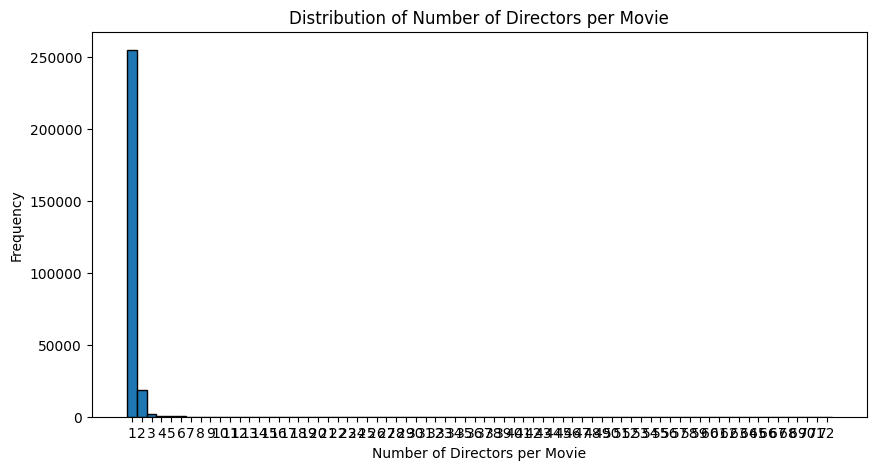

In [19]:
# Check the length of director list for each movie
import matplotlib.pyplot as plt
import numpy as np

# Extract the number of directors for each movie
director_counts = processed_data["director"].apply(len)
director_counts_max= director_counts.max()
max_length_95_percent = int(np.percentile(director_counts, 95))

print(f"Max number of directors for 95% of movies: {max_length_95_percent}")
print(f"Movie with maximum number of directors has {director_counts_max} directors")

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(director_counts, bins=range(1, director_counts.max() + 2), edgecolor="black", align="left")
plt.xlabel("Number of Directors per Movie")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Directors per Movie")
plt.xticks(range(1, director_counts.max() + 1))


#### Writer

Max number of writers for 95% of movies: 3
Movie with maximum number of writers has 66 writers


([<matplotlib.axis.XTick at 0x3178a4b80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Te

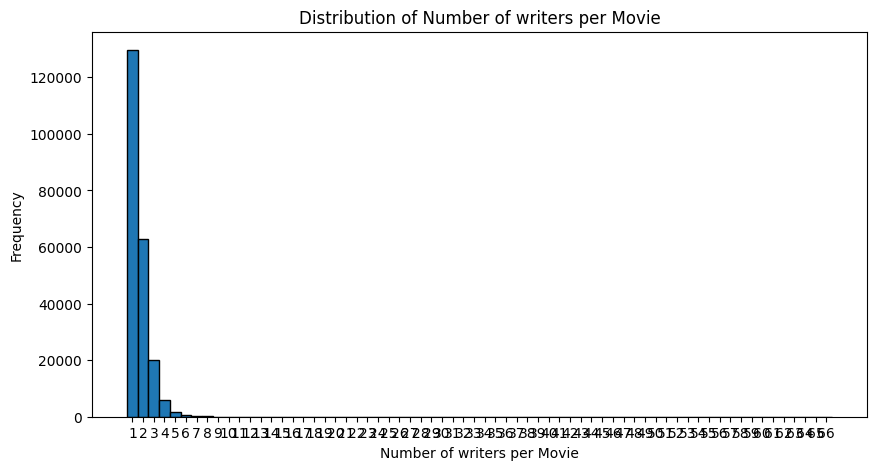

In [20]:
# Check the length of writer list for each movie
import matplotlib.pyplot as plt
import numpy as np

# Extract the number of writers for each movie
writer_counts = processed_data["writer"].apply(len)
writer_counts_max= writer_counts.max()
max_length_95_percent = int(np.percentile(writer_counts, 95))

print(f"Max number of writers for 95% of movies: {max_length_95_percent}")
print(f"Movie with maximum number of writers has {writer_counts_max} writers")

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(writer_counts, bins=range(1, writer_counts.max() + 2), edgecolor="black", align="left")
plt.xlabel("Number of writers per Movie")
plt.ylabel("Frequency")
plt.title("Distribution of Number of writers per Movie")
plt.xticks(range(1, writer_counts.max() + 1))


In [38]:
processed_data.writer

0         [Kim Dae-hwan, Bong Joon-ho, Han Jin-won]
1                   [Daniel Kwan, Daniel Scheinert]
2                   [Jim Uhls, Andrew Kevin Walker]
3                                 [Damien Chazelle]
4                               [Christopher Nolan]
                            ...                    
279046                                           []
279047                                           []
279048            [Nripendra Krishna Chattopadhyay]
279049                      [Porter Emerson Browne]
279050                             [Carl Barcklind]
Name: writer, Length: 279051, dtype: object

#### Cinematography

Max number of cinematographys for 95% of movies: 2
Movie with maximum number of cinematographys has 29 cinematographys


([<matplotlib.axis.XTick at 0x317a183d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

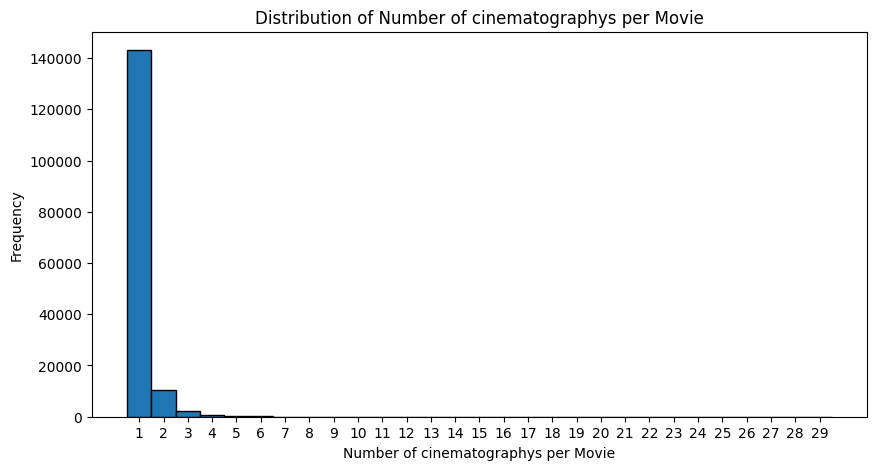

In [21]:
# Check the length of cinematography list for each movie
import matplotlib.pyplot as plt
import numpy as np

# Extract the number of cinematographys for each movie
cinematography_counts = processed_data["cinematography"].apply(len)
cinematography_counts_max= cinematography_counts.max()
max_length_95_percent = int(np.percentile(cinematography_counts, 95))

print(f"Max number of cinematographys for 95% of movies: {max_length_95_percent}")
print(f"Movie with maximum number of cinematographs has {cinematography_counts_max} cinematographs")

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(cinematography_counts, bins=range(1, cinematography_counts.max() + 2), edgecolor="black", align="left")
plt.xlabel("Number of cinematographys per Movie")
plt.ylabel("Frequency")
plt.title("Distribution of Number of cinematographys per Movie")
plt.xticks(range(1, cinematography_counts.max() + 1))

#### Composer

Max number of composers for 95% of movies: 2
Movie with maximum number of composers has 45 composers


([<matplotlib.axis.XTick at 0x317c78bb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

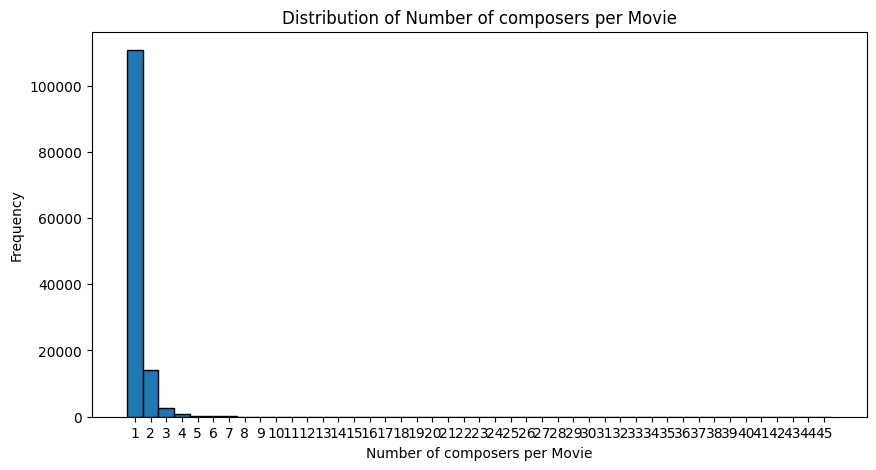

In [23]:
# Check the length of composer list for each movie
import matplotlib.pyplot as plt
import numpy as np

# Extract the number of composers for each movie
composer_counts = processed_data["composer"].apply(len)
composer_counts_max= composer_counts.max()
max_length_95_percent = int(np.percentile(composer_counts, 95))

print(f"Max number of composers for 95% of movies: {max_length_95_percent}")
print(f"Movie with maximum number of composers has {composer_counts_max} composers")

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(composer_counts, bins=range(1, composer_counts.max() + 2), edgecolor="black", align="left")
plt.xlabel("Number of composers per Movie")
plt.ylabel("Frequency")
plt.title("Distribution of Number of composers per Movie")
plt.xticks(range(1, composer_counts.max() + 1))

In [54]:
processed_data[["director", "director_encoded","director_encoded_padded" ]]

,director,director_encoded,director_encoded_padded
0,[Bong Joon-ho],[13229],"[0, 13229]"
1,"[Daniel Scheinert, Daniel Kwan]","[22709, 22528]","[22709, 22528]"
2,[David Fincher],[23923],"[0, 23923]"
3,[Damien Chazelle],[21795],"[0, 21795]"
4,[Christopher Nolan],[19476],"[0, 19476]"
...,...,...,...
279046,[Kentaro Uchida],[58191],"[0, 58191]"
279047,[Rodion Yefimenko],[91477],"[0, 91477]"
279048,[Sudhir Mukherjee],[101665],"[0, 101665]"
279049,[Walter Edwin],[110775],"[0, 110775]"


In [53]:
processed_data[["writer", "writer_encoded","writer_encoded_padded" ]]

,writer,writer_encoded,writer_encoded_padded
0,"[Kim Dae-hwan, Bong Joon-ho, Han Jin-won]","[75821, 17143, 50507]","[75821, 17143, 50507]"
1,"[Daniel Kwan, Daniel Scheinert]","[28640, 28847]","[0, 28640, 28847]"
2,"[Jim Uhls, Andrew Kevin Walker]","[64115, 8015]","[0, 64115, 8015]"
3,[Damien Chazelle],[27782],"[0, 0, 27782]"
4,[Christopher Nolan],[24903],"[0, 0, 24903]"
...,...,...,...
279046,[],[],"[0, 0, 0]"
279047,[],[],"[0, 0, 0]"
279048,[Nripendra Krishna Chattopadhyay],[102843],"[0, 0, 102843]"
279049,[Porter Emerson Browne],[110253],"[0, 0, 110253]"


## Embeddings

In [51]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras_preprocessing.sequence import pad_sequences
###
def encode_list_column_with_padding(df, column_name, max_length=2, padding_value=0):
    """
    Encodes a column containing lists of categorical values (e.g., directors) and applies padding.
    """
    # Flatten unique values for encoding
    unique_values = sorted(set(value for sublist in df[column_name] for value in sublist))

    # Fit LabelEncoder once
    encoder = LabelEncoder()
    encoder.fit(unique_values)

    # Create mapping dictionary for faster lookup
    encoding_map = {label: idx for idx, label in enumerate(encoder.classes_)}

    # Apply encoding efficiently
    df[f"{column_name}_encoded"] = df[column_name].apply(lambda x: [encoding_map[v] for v in x])

    # Apply padding to ensure fixed-length sequences
    df[f"{column_name}_encoded_padded"] = list(
        pad_sequences(df[f"{column_name}_encoded"], maxlen=max_length, padding='pre', value=padding_value)
    )

    return df, len(unique_values)


In [52]:
df_encoded, unique_directors = encode_list_column_with_padding(processed_data, "director")
df_encoded, unique_writers = encode_list_column_with_padding(df_encoded, "writer", max_length=3)
df_encoded, unique_composers = encode_list_column_with_padding(df_encoded, "composer")
df_encoded, unique_cinematographers = encode_list_column_with_padding(df_encoded, "cinematography")

In [ ]:
df_en

In [29]:
df_encoded

,name,date,description,minute,genre_list,actor_list,language,crew_dict,key_b,comedy,...,cinematography,composer,director_encoded,director_encoded_padded,writer_encoded,writer_encoded_padded,composer_encoded,composer_encoded_padded,cinematography_encoded,cinematography_encoded_padded
0,Parasite,0.388889,unemployed kitaeks family take peculiar intere...,0.462312,"['comedy', 'thriller', 'drama']","['Song Kang-ho', 'Lee Sun-kyun', 'Cho Yeo-jeon...",Korean,"{'Cinematography': ['Hong Kyung-pyo'], 'Compos...",Parasite (2019),1,...,[Hong Kyung-pyo],[Jung Jae-il],[13229],"[13229, 0]","[75821, 17143, 50507]","[17143, 50507]",[21802],"[21802, 0]",[17939],"[17939, 0]"
1,Everything Everywhere All at Once,0.472222,age chinese immigrant sweep insane adventure a...,0.497487,"['science fiction', 'adventure', 'comedy', 'ac...","['Michelle Yeoh', 'Ke Huy Quan', 'Stephanie Hs...",English,"{'Cinematography': ['Larkin Seiple'], 'Compose...",Everything Everywhere All at Once (2022),1,...,[Larkin Seiple],"[Ryan Lott, Rafiq Bhatia, Ian Chang]","[22709, 22528]","[22709, 22528]","[28640, 28847]","[28640, 28847]","[36161, 33764, 16830]","[33764, 16830]",[26425],"[26425, 0]"
2,Fight Club,-0.166667,tickingtimebomb insomniac slippery soap salesm...,0.492462,['drama'],"['Edward Norton', 'Brad Pitt', 'Helena Bonham ...",English,"{'Cinematography': ['Jeff Cronenweth'], 'Compo...",Fight Club (1999),0,...,[Jeff Cronenweth],"[John King, Michael Simpson]",[23923],"[23923, 0]","[64115, 8015]","[64115, 8015]","[20277, 28327]","[20277, 28327]",[20799],"[20799, 0]"
3,La La Land,0.305556,mia aspire actress serve latte movie star audi...,0.442211,"['drama', 'comedy', 'music', 'romance']","['Ryan Gosling', 'Emma Stone', 'John Legend', ...",English,"{'Cinematography': ['Linus Sandgren'], 'Compos...",La La Land (2016),1,...,[Linus Sandgren],[Justin Hurwitz],[21795],"[21795, 0]",[27782],"[27782, 0]",[21880],"[21880, 0]",[27230],"[27230, 0]"
4,Oppenheimer,0.500000,story j robert oppenheimer role development at...,0.703518,"['drama', 'history']","['Cillian Murphy', 'Emily Blunt', 'Matt Damon'...",English,"{'Cinematography': ['Hoyte van Hoytema'], 'Com...",Oppenheimer (2023),0,...,[Hoyte van Hoytema],[Ludwig Göransson],[19476],"[19476, 0]",[24903],"[24903, 0]",[25100],"[25100, 0]",[18029],"[18029, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279046,Red Ink Ghost Stories,-1.027778,vampire yoshitsune appear rashomon every night...,0.020101,"['horror', 'tv movie']","['Masaya Kikawada', 'Tomoko Sekihara', '源九郎判官義経']",Japanese,{'Director': ['Kentaro Uchida']},Red Ink Ghost Stories (1968),0,...,[],[],[58191],"[58191, 0]",[],"[0, 0]",[],"[0, 0]",[],"[0, 0]"
279047,Svichka's Wedding,-1.194444,spectacle version ivan franko theater base “ c...,0.271357,['drama'],"['Viktor Tsymbalist', 'Olga Kusenko', 'Dmytro ...",Ukrainian,"{'Cinematography': ['Serhiy Revenko'], 'Compos...",Svichka's Wedding (1962),0,...,[Serhiy Revenko],[R. Rozhdestvenskyi],[91477],"[91477, 0]",[],"[0, 0]",[33598],"[33598, 0]",[41504],"[41504, 0]"
279048,Two Brothers,-1.222222,two brother utpal elder kamal younger love see...,0.412060,"['drama', 'romance']","['Uttam Kumar', 'Biswajeet Chatterjee', 'Sabit...","Bengali, Bangla","{'Cinematography': ['Bibhuti Chakraborty'], 'D...",Two Brothers (1961),0,...,[Bibhuti Chakraborty],[],[101665],"[101665, 0]",[102843],"[102843, 0]",[],"[0, 0]",[5420],"[5420, 0]"
279049,The Spendthrift,-2.500000,remarkable sixpart adaptation sensational stag...,0.125628,['drama'],"['Irene Fenwick', 'Cyril Keightley', 'Malcolm ...",English,"{'Director': ['Walter Edwin'], 'Writer': ['Por...",The Spendthrift (1915),0,...,[],[],[110775],"[110775, 0]",[110253],"[110253, 0]",[],"[0, 0]",[],"[0, 0]"


In [31]:
def cat_processing_genre(df, value):
    unique_genres = set(genre for genres in df[value] for genre in eval(genres))
    for genre in unique_genres:
        df[genre] = df[value].apply(lambda x: 1 if genre in x else 0)
    return df.rename(columns={
    'science fiction': 'science_fiction',
    'tv movie': 'tv_movie'
    })

In [32]:
df_encoded = cat_processing_genre(df_encoded, "genre_list")

In [33]:
df_encoded

,name,date,description,minute,genre_list,actor_list,language,crew_dict,key_b,comedy,...,cinematography,composer,director_encoded,director_encoded_padded,writer_encoded,writer_encoded_padded,composer_encoded,composer_encoded_padded,cinematography_encoded,cinematography_encoded_padded
0,Parasite,0.388889,unemployed kitaeks family take peculiar intere...,0.462312,"['comedy', 'thriller', 'drama']","['Song Kang-ho', 'Lee Sun-kyun', 'Cho Yeo-jeon...",Korean,"{'Cinematography': ['Hong Kyung-pyo'], 'Compos...",Parasite (2019),1,...,[Hong Kyung-pyo],[Jung Jae-il],[13229],"[13229, 0]","[75821, 17143, 50507]","[17143, 50507]",[21802],"[21802, 0]",[17939],"[17939, 0]"
1,Everything Everywhere All at Once,0.472222,age chinese immigrant sweep insane adventure a...,0.497487,"['science fiction', 'adventure', 'comedy', 'ac...","['Michelle Yeoh', 'Ke Huy Quan', 'Stephanie Hs...",English,"{'Cinematography': ['Larkin Seiple'], 'Compose...",Everything Everywhere All at Once (2022),1,...,[Larkin Seiple],"[Ryan Lott, Rafiq Bhatia, Ian Chang]","[22709, 22528]","[22709, 22528]","[28640, 28847]","[28640, 28847]","[36161, 33764, 16830]","[33764, 16830]",[26425],"[26425, 0]"
2,Fight Club,-0.166667,tickingtimebomb insomniac slippery soap salesm...,0.492462,['drama'],"['Edward Norton', 'Brad Pitt', 'Helena Bonham ...",English,"{'Cinematography': ['Jeff Cronenweth'], 'Compo...",Fight Club (1999),0,...,[Jeff Cronenweth],"[John King, Michael Simpson]",[23923],"[23923, 0]","[64115, 8015]","[64115, 8015]","[20277, 28327]","[20277, 28327]",[20799],"[20799, 0]"
3,La La Land,0.305556,mia aspire actress serve latte movie star audi...,0.442211,"['drama', 'comedy', 'music', 'romance']","['Ryan Gosling', 'Emma Stone', 'John Legend', ...",English,"{'Cinematography': ['Linus Sandgren'], 'Compos...",La La Land (2016),1,...,[Linus Sandgren],[Justin Hurwitz],[21795],"[21795, 0]",[27782],"[27782, 0]",[21880],"[21880, 0]",[27230],"[27230, 0]"
4,Oppenheimer,0.500000,story j robert oppenheimer role development at...,0.703518,"['drama', 'history']","['Cillian Murphy', 'Emily Blunt', 'Matt Damon'...",English,"{'Cinematography': ['Hoyte van Hoytema'], 'Com...",Oppenheimer (2023),0,...,[Hoyte van Hoytema],[Ludwig Göransson],[19476],"[19476, 0]",[24903],"[24903, 0]",[25100],"[25100, 0]",[18029],"[18029, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279046,Red Ink Ghost Stories,-1.027778,vampire yoshitsune appear rashomon every night...,0.020101,"['horror', 'tv movie']","['Masaya Kikawada', 'Tomoko Sekihara', '源九郎判官義経']",Japanese,{'Director': ['Kentaro Uchida']},Red Ink Ghost Stories (1968),0,...,[],[],[58191],"[58191, 0]",[],"[0, 0]",[],"[0, 0]",[],"[0, 0]"
279047,Svichka's Wedding,-1.194444,spectacle version ivan franko theater base “ c...,0.271357,['drama'],"['Viktor Tsymbalist', 'Olga Kusenko', 'Dmytro ...",Ukrainian,"{'Cinematography': ['Serhiy Revenko'], 'Compos...",Svichka's Wedding (1962),0,...,[Serhiy Revenko],[R. Rozhdestvenskyi],[91477],"[91477, 0]",[],"[0, 0]",[33598],"[33598, 0]",[41504],"[41504, 0]"
279048,Two Brothers,-1.222222,two brother utpal elder kamal younger love see...,0.412060,"['drama', 'romance']","['Uttam Kumar', 'Biswajeet Chatterjee', 'Sabit...","Bengali, Bangla","{'Cinematography': ['Bibhuti Chakraborty'], 'D...",Two Brothers (1961),0,...,[Bibhuti Chakraborty],[],[101665],"[101665, 0]",[102843],"[102843, 0]",[],"[0, 0]",[5420],"[5420, 0]"
279049,The Spendthrift,-2.500000,remarkable sixpart adaptation sensational stag...,0.125628,['drama'],"['Irene Fenwick', 'Cyril Keightley', 'Malcolm ...",English,"{'Director': ['Walter Edwin'], 'Writer': ['Por...",The Spendthrift (1915),0,...,[],[],[110775],"[110775, 0]",[110253],"[110253, 0]",[],"[0, 0]",[],"[0, 0]"
